# Building a basic Quantum Adder using Toffoli Gates 
by Arjun Angirishi 
20112023

## Importing Essential Libraries

Run the below command in case qiskit is not installed in local machine

In [1]:
# !pip install qiskit 

#### Importing essential libraries

In [2]:
# Qiskit library contains all the essential functions which we will be needing
from qiskit import *
from qiskit.tools.visualization import plot_histogram

### What is a Full Adder Circuit

An adder is a digital logic circuit in electronics that is extensively used for the addition of numbers.The full-adder has three inputs and two outputs, whereas half adder has only two inputs and two outputs. The first two inputs are A and B and the third input is an input carry as C-IN and it produces two outputs output carry C-OUT and sum S.

### The Truth Table

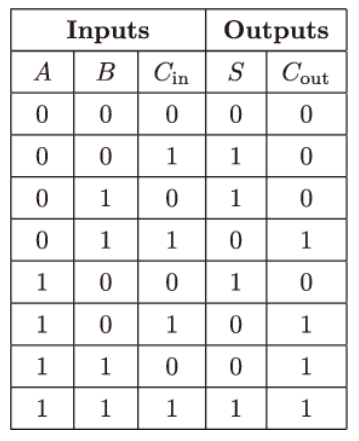

### Constructing a single qubit quantum adder

In [3]:
# Creating a reusable function to create single bit adder which can later be cascaded as per our requirements

def single_bit_adder(qc,a, b, c_in_sum, c_out):
    qc.ccx(a, b, c_out)
    qc.cx(a, b)
    qc.ccx(b, c_in_sum, c_out)
    qc.cx(b, c_in_sum)
    qc.cx(a, b)
    return qc

So the basic adder circuit is made using CNOT and CCNOT gates where CNOT is used to find the rightmost bit and CCNOT is used to calculate the next bit. 

In [4]:
#Initializing the Quantum And the Classical Registers as per our need. Since we are testing 1-bit adder, taking A and B as 1 will be sufficient
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
c_in = QuantumRegister(1, 'c_in')
c_out = QuantumRegister(1, 'c_out')

#Classical Registers are used for storing the outputs
output = ClassicalRegister(2, 'output')

#Composing the Quantum Circuit
qc = QuantumCircuit(a, b, c_in, c_out, output)

In [5]:
qc.x(b[0])
#qc.x(a[0]) We can toggle these comments to try different types of inputs.
#qc.x(c_in[0])

Performing the basic 1 bit addition, Taking A as 0 and B as 1 with 0 Carry Input.
So we expect 01 as our output

In [6]:
adder_circuit = single_bit_adder(qc,a, b, c_in, c_out)
qc.compose(adder_circuit) #Composing the single bit adder circuit


# setting up the measurement to be sent to the Classical Register
qc.measure(c_out,output[1])
qc.measure(c_in,output[0])

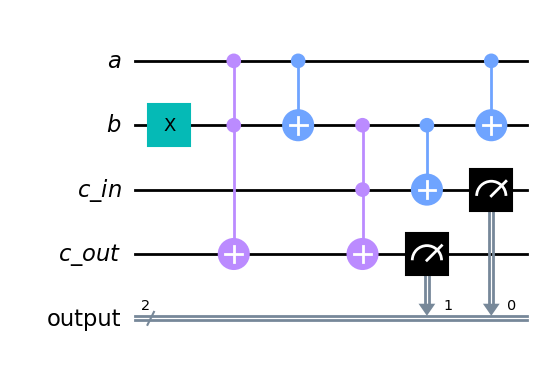

In [7]:
# Used to create a drawing/diagram of the circuit
qc.draw(output='mpl')

{'01': 2048}


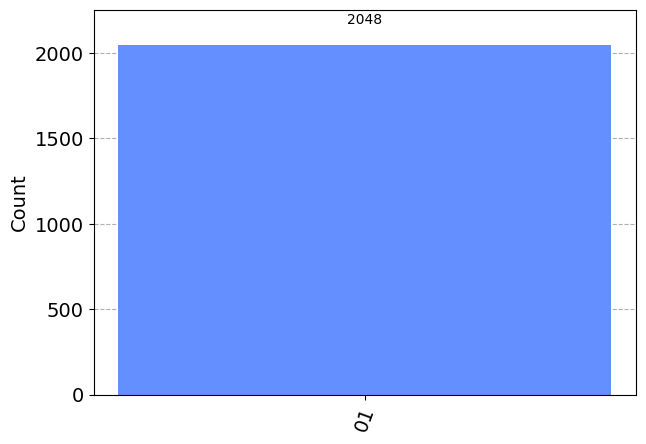

In [8]:
simulator = Aer.get_backend('qasm_simulator') # Using a Qasm Simulator  
job = execute(qc, simulator, shots=2048) # Using 256 shots ie 256 evaluating the values
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts) # Showing result in the form of histogram

### Creating 4 bit adder

To make the desired adder, we will cascade 4 single bit adders together

In [9]:
def create_4bit_adder(A, B, c_in, c_out, output):   
    qct = QuantumCircuit(A, B, c_in, c_out, output)
    #Using multiple single Bit adder to create desired adder
    for i in range(4):
        qct.cx(c_out, c_in[i])
        qct.cx(c_in[i], c_out)
        single_bit_adder(qct, A[i], B[i], c_in[i], c_out)
    for i in range(4):
        qct.measure(c_in[i], output[i])
    qct.measure(c_out, output[4])
    return qct

In [10]:
# Initializing the number of Registers to be used
A = QuantumRegister(4, 'A')
B = QuantumRegister(4, 'B')
c_in = QuantumRegister(4, 'c_in')
c_out = QuantumRegister(1, 'c_out')
output = ClassicalRegister(5, 'output')

### Test Case-1

* A:'0010'
* B:'1011'

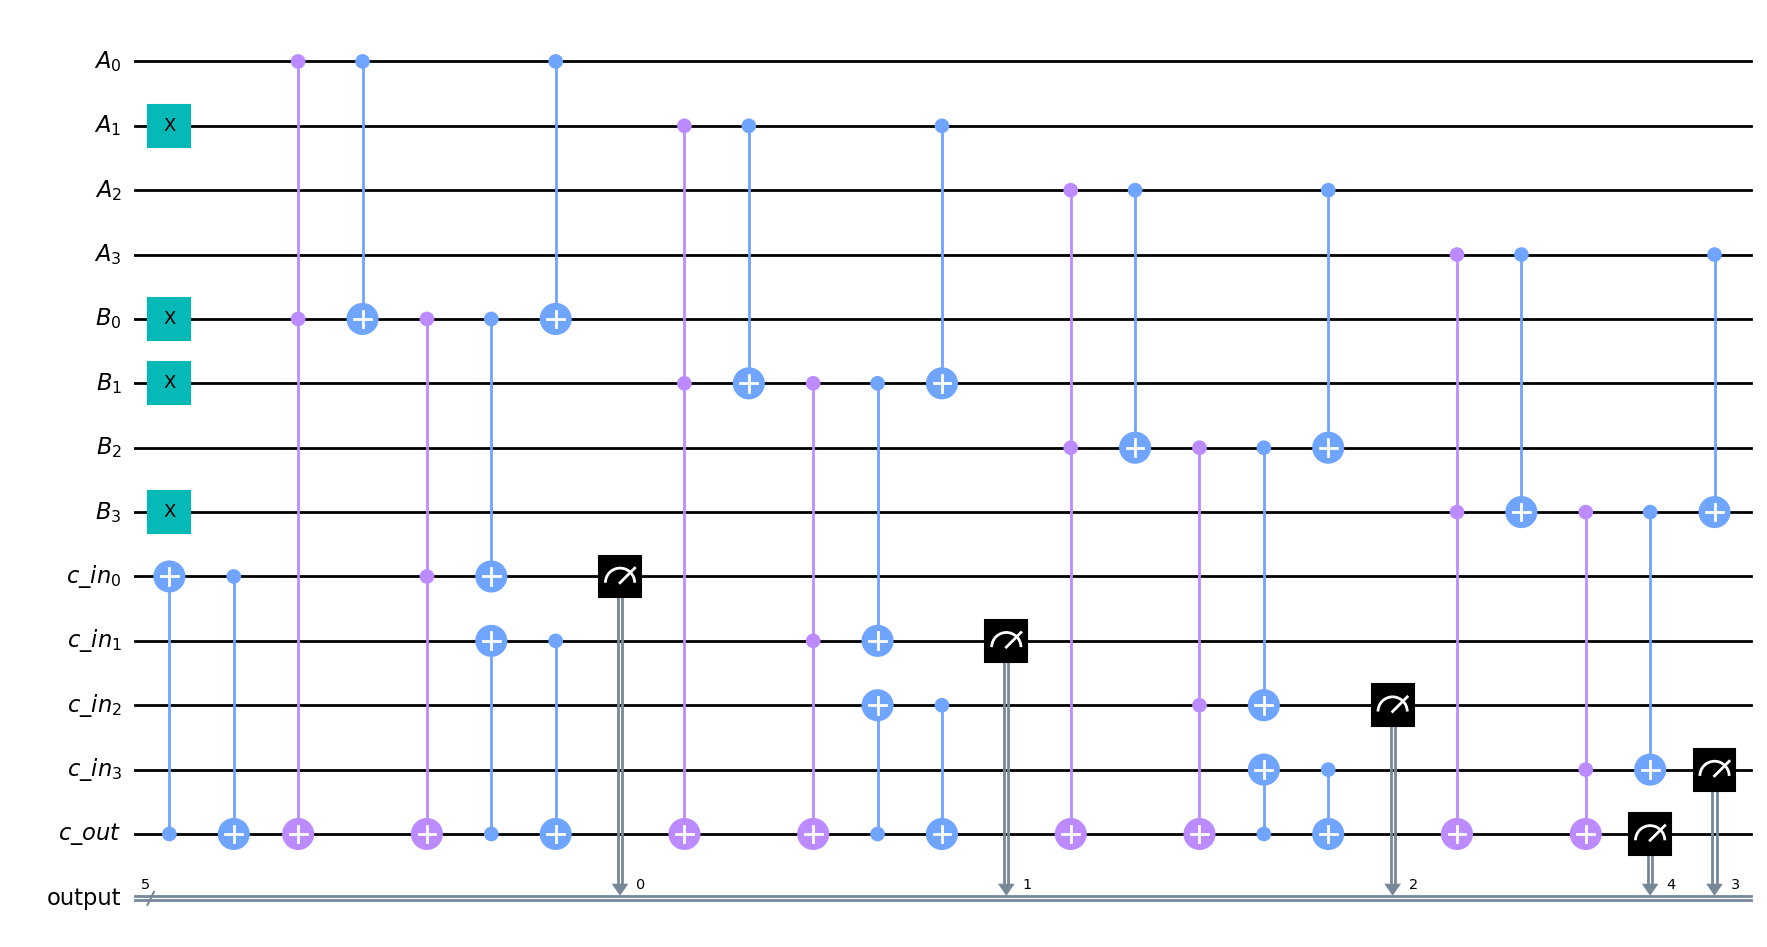

In [11]:
qc = QuantumCircuit(A, B, c_in, c_out, output)

# Initializing A and B to the desired states
qc.x(A[1])
qc.x(B[0])
qc.x(B[1])
qc.x(B[3])

# Creating the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

# Combining the circuits
qc = qc.compose(adder_circuit)

# Adder Circuit Visualization
qc.draw(output = 'mpl')

{'01101': 2048}


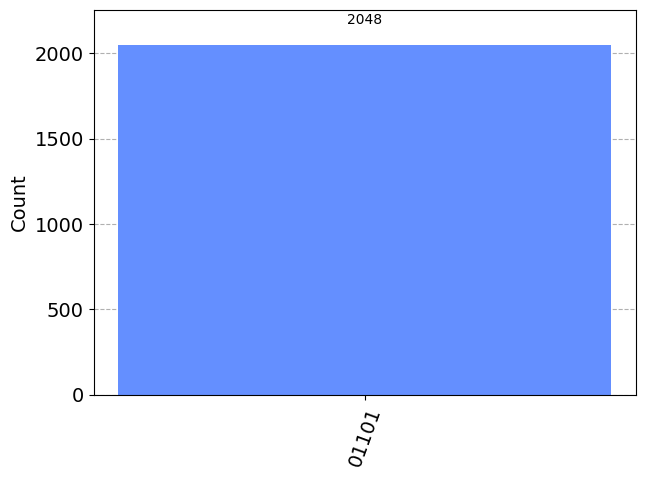

In [12]:
# Simulation of the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=2048)
result = job.result()
counts = result.get_counts()

#Using 2048 shots for better results

# Histogram of the output counts
print(counts)
plot_histogram(counts)

In [13]:
# Resetting the Values
qc.reset(A)
qc.reset(B)
qc.reset(c_in)
qc.reset(c_out)

### Test Case - 2

* A : 0001
* B : 0011

In [14]:
# Initializing A and B to the desired states
qc.x(A[0])
qc.x(B[0])
qc.x(B[1])

# Creating the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

# Combining the circuits
qc = qc.compose(adder_circuit)

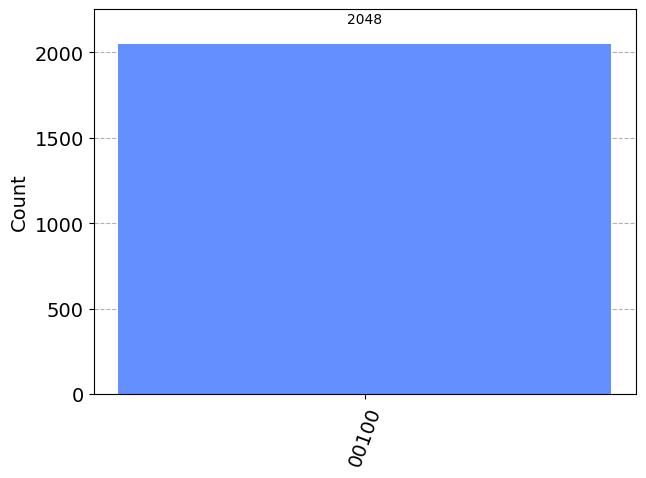

In [15]:
# Simulation of the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=2048)
result = job.result()
counts = result.get_counts()

#Plotting the Result using Histogram
plot_histogram(counts)

In [16]:
# Resetting the Values
qc.reset(A)
qc.reset(B)
qc.reset(c_in)
qc.reset(c_out)

### Test Case -3

* A: (1/sqrt(2))(|0010> + |0100>)
* B: (1/sqrt(2))(|0001> + |1011>)

In [17]:
# Initializing A and B to the desired states
qc.x(A[1])
qc.h(A[2])
qc.cx(A[1],A[2])
qc.cx(A[2],A[1])
qc.x(B[0])
qc.x(B[1])
qc.h(B[3])
qc.cx(B[1],B[3])
qc.cx(B[3],B[1])
qc.x(B[3])

# Creating the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

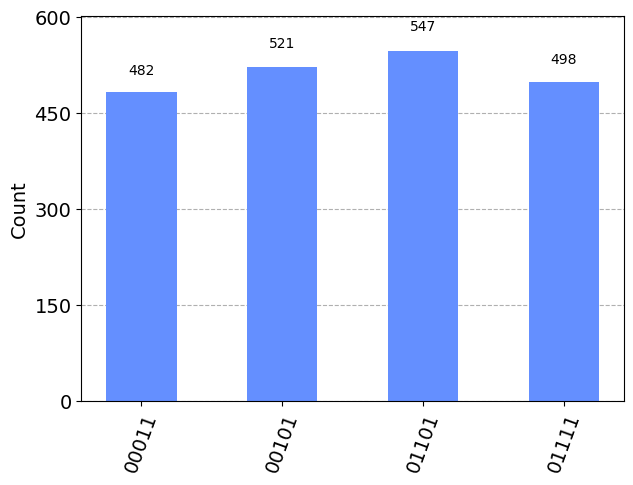

In [18]:
# Simulation of the circuit
qc = qc.compose(adder_circuit)
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=2048)
result = job.result()
counts = result.get_counts()

#Plotting the Result using Histogram
plot_histogram(counts)

In [19]:
# Resetting the Values
qc.reset(A)
qc.reset(B)
qc.reset(c_in)
qc.reset(c_out)

### Test Case 4

* A: (1/sqrt(2))(|0000> + |0111>)
* B: (1/sqrt(2))(|0111> + |1000>)

In [20]:
# Initializing A and B to the desired states
qc.x(A[0])
qc.h(A[1])
qc.x(A[2])
qc.cx(A[1],A[2])
qc.cx(A[1],A[0])
qc.x(A[1])
qc.x(B[0])
qc.h(B[1])
qc.x(B[2])
qc.x(B[3])
qc.cx(B[1],B[2])
qc.cx(B[1],B[0])
qc.x(B[1])
qc.cx(B[1],B[3])

# Create the 4-bit adder circuit
adder_circuit = create_4bit_adder(A, B, c_in, c_out, output)

# Combine the circuits
qc = qc.compose(adder_circuit)

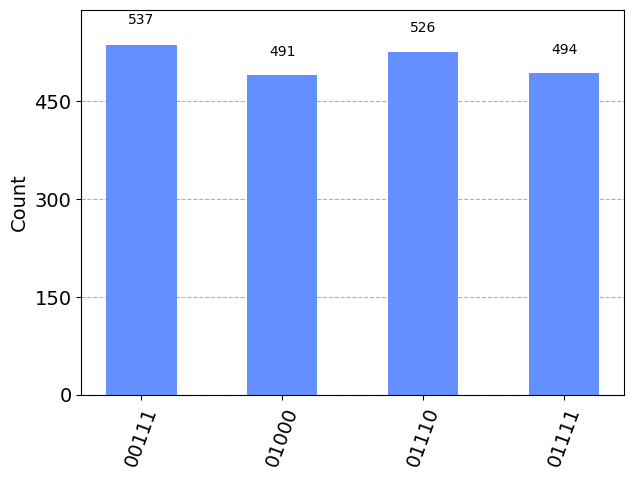

In [21]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=2048)
result = job.result()
counts = result.get_counts()

#Plotting the Result using Histogram
plot_histogram(counts)